# Linear Regression using Gradient Descent

## Math behind it
---

**Linear Regression Model**

We can predict an output $ y $ given an input $ x $ with the following linear model: 

$$
\hat{y}^{(i)} = h_\theta(x^{(i)}) = \theta_0 + \theta_1 x^{(i)}
$$

Where:
- $ y^{(i)} $: observed/actual output (dependent variable)
- $ \hat{y}^{(i)} $: predicted output
- $ h_\theta(x^{(i)}) $: hypothesis function 
- $ x^{(i)} $: input (independent variable)
- $ \theta_0 $: intercept (bias)
- $ \theta_1 $: slope (weight)

<br><br>
Our goal is to minimize the Mean Squared Error (MSE) cost function iteratively untill we converge on its minimum through a process called gradient descent. 


<br><br>
**MSE Cost Function:**

The MSE measures the average squared difference between the predicted and the actual values in the dataset. Squaring the error, makes it so that the positive and negative differences dont cancel out, while also penalazing large mistakes more heavily compared to small ones. The convex(single minimum) nature of the MSE function in our simple application makes it so that when using gradient descent we dont get stuck in a local non-optimal minimum. 
$$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m ( h_\theta(x^{(i)}) - y^{(i)})^2
$$

Where:
- $ J(\theta) $: the cost function 
- $ m $: training set size


note: 

we multiply the cost function by $ \frac{1}{2} $ to make taking the derivatives simpler, hence the $ \frac{1}{2m} $ instead of 
$ \frac{1}{m} $, since multiplying the cost function by a scalar does not affect the location of its minimum 


<br><br>
**Gradient Descent**

The gradient descent algorithm updates the weights in an effort to find $ \theta $ that minimizes the cost, which will be in the direction of the negative gradient. The general update rule is as follows:  

$$
\theta := \theta - \alpha \nabla_\theta J(\theta)
$$
meaning, 
$$
\theta_j := \theta_j - \alpha \frac{\partial }{\partial \theta_j} J(\theta)
$$

Where: 
- $ \alpha $: learning rate

note: 

An appropriate choice of learning rate is crucial
- Too small: leads to slow convergence 
- Too large: may overshoot the minimum and lead to divergence 


<br><br>
**Final Update Rules**

computing the partial derivatives of the cost function gives us the following: 
$$
\frac{\partial }{\partial \theta_0} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m ( h_\theta(x^{(i)}) - y^{(i)})
$$
$$
\frac{\partial }{\partial \theta_1} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m ( h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}
$$
subbing it into our general update rule we get: 
$$
\theta_0 := \theta_0 - \alpha  \frac{1}{m} \sum_{i=1}^m ( h_\theta(x^{(i)}) - y^{(i)})
$$
$$
\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m ( h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}
$$

These updates are repeated until $ \theta_0 $ and $ \theta_1 $ converge on an optimal value that minimizes the cost function.

<br><br>
See the below images for the step-by-step math involved with computing the partial derivatives of the cost function: 

---

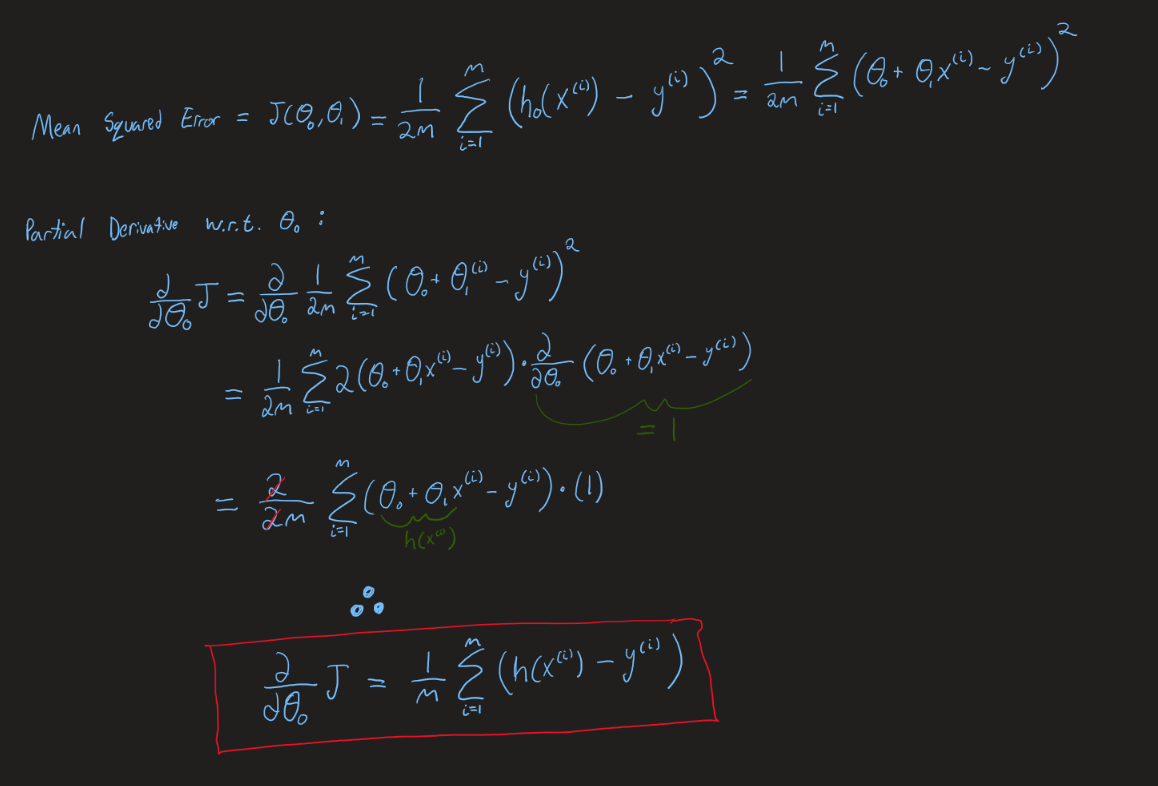
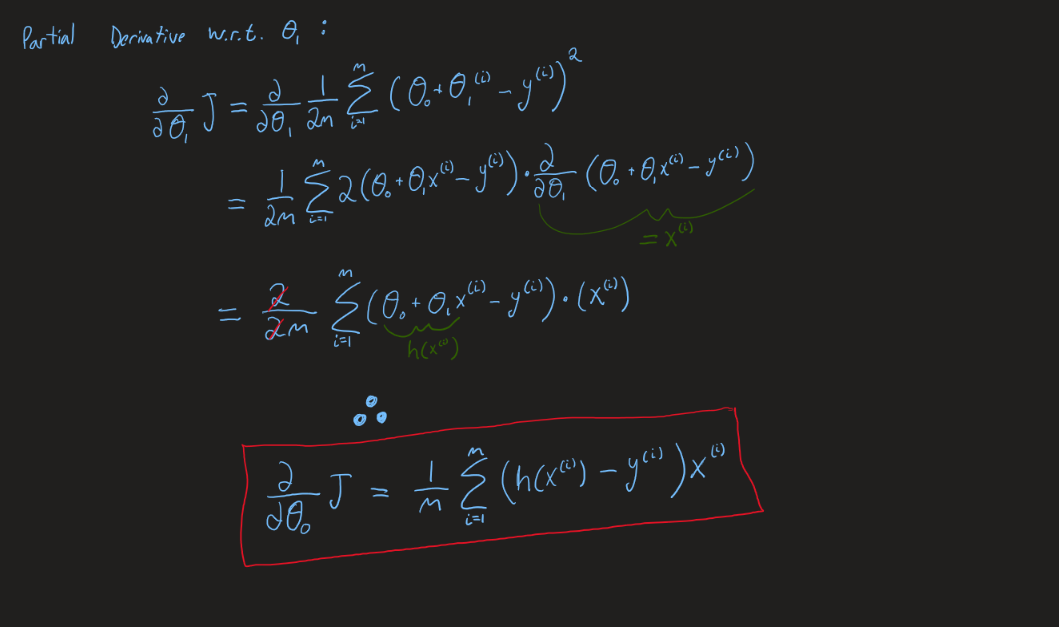

## Code
---

In [17]:
class LinearRegression:
    def __init__(self):
        self.theta_0 = 0.0  # Intercept
        self.theta_1 = 0.0  # Slope


    def fit(self, x, y, alpha=0.01,  epochs=100, verbose=0):
        for epoch in range(1, epochs + 1):
            y_pred = self.predict(x)
            grad_0, grad_1 = self._compute_gradients(x, y, y_pred)
            self._update_parameters(grad_0, grad_1, alpha) 

            if verbose != 0 and (epoch % verbose == 0 or epoch == 1 or epoch == epochs):
                print(f"Epoch: {epoch}/{epochs}, MSE: {self.mse(x, y):.6f}, theta_0: {self.theta_0:.4f}, theta_1: {self.theta_1:.4f}")


    def _compute_gradients(self, x, y, y_pred):
        m = len(x)
        
        grad_0 = sum(y_pred[i] - y[i] for i in range(m)) / m
        grad_1 = sum((y_pred[i] - y[i])*x[i] for i in range(m)) / m 
        
        return grad_0, grad_1
    
    def _update_parameters(self, grad_0, grad_1, alpha):
        self.theta_0 -= alpha * grad_0
        self.theta_1 -= alpha * grad_1 

    def predict(self, x_new):
        return [self.theta_0 + self.theta_1 * x_i for x_i in x_new]

    def mse(self, x, y):
        predictions = self.predict(x)
        m = len(predictions)
        return sum((predictions[i] - y[i]) ** 2 for i in range(len(y))) / m

    def coefficients(self):
        return  self.theta_0, self.theta_1  


In [18]:
# Sample data --> y = 2x + 1
x = [0, 1, 2, 3, 4, 5]
y = [1, 3, 5, 7, 9, 11]

# Train model
model = LinearRegression()
model.fit(x, y, alpha=0.1, epochs=100, verbose=25)

# Predict 
x_test = [10, 20]
predictions = model.predict(x_test)

# Output results 
theta_0, theta_1 = model.coefficients()
print(f"\nSlope: {theta_1}")
print(f"Intercept: {theta_0}")
print(f"Predictions for x={x_test}: {predictions}")
print(f"MSE: {model.mse(x, y)}")

Epoch: 1/100, MSE: 0.056991, theta_0: 0.6000, theta_1: 2.0833
Epoch: 25/100, MSE: 0.011635, theta_0: 0.8090, theta_1: 2.0538
Epoch: 50/100, MSE: 0.002597, theta_0: 0.9098, theta_1: 2.0254
Epoch: 75/100, MSE: 0.000580, theta_0: 0.9574, theta_1: 2.0120
Epoch: 100/100, MSE: 0.000129, theta_0: 0.9799, theta_1: 2.0057

Slope: 2.005676370747033
Intercept: 0.9798575252352996
Predictions for x=[10, 20]: [21.036621232705627, 41.09338494017595]
MSE: 0.0001293993782068545
